In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from numpynet.data import Dataloader,train_test_split, onehot_encode, onehot_decode
from numpynet.layers import Activation, Dense
from numpynet.loss import Crossentropy
from numpynet.model import Sequential
from numpynet.optim import Adam
from numpynet.metrics import acc
from numpynet.model_selection import plot_training

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [3]:
x_train = x_train.reshape(-1,28*28).astype('float32') /255.
y_train = onehot_encode(y_train,10)

x_test = x_test.reshape(-1,28*28).astype('float32') /255.
y_test = onehot_encode(y_test,10)

In [4]:
x_train, y_train, x_val, y_val =  train_test_split(x_train,y_train,train_size=0.8,shuffle=True)

batch_size = 128
train_dataloader = Dataloader(x_train, y_train, batch_size,shuffle=True)
val_dataloader = Dataloader(x_val, y_val, batch_size,shuffle=True)

epoch : 1/5, train_loss = 0.644419, train_metric = 0.790792, val_loss = 0.223351, val_metric = 0.932652, lr = 0.001
epoch : 2/5, train_loss = 0.182548, train_metric = 0.945604, val_loss = 0.148141, val_metric = 0.956782, lr = 0.001
epoch : 3/5, train_loss = 0.132553, train_metric = 0.960438, val_loss = 0.126793, val_metric = 0.961907, lr = 0.001
epoch : 4/5, train_loss = 0.103273, train_metric = 0.968437, val_loss = 0.115609, val_metric = 0.967503, lr = 0.001
epoch : 5/5, train_loss = 0.085437, train_metric = 0.973917, val_loss = 0.097402, val_metric = 0.970634, lr = 0.001


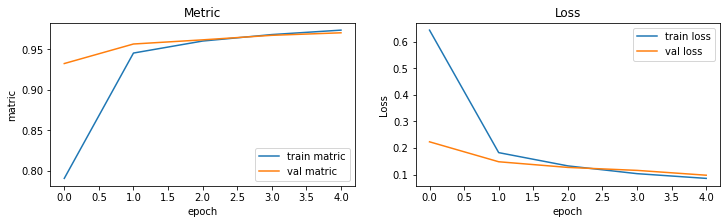

In [5]:
input_dim = 784
output_dim = 10

model = Sequential()
model.add(Dense(input_dim,254,initialization="he"))
model.add(Activation(activation="relu"))
model.add(Dense(254,128,initialization="he"))
model.add(Activation(activation="relu"))
model.add(Dense(128,64,initialization="he"))
model.add(Activation(activation="relu"))
model.add(Dense(64,output_dim,initialization="he"))
model.add(Activation(activation="softmax"))

loss = Crossentropy()
lr = 1e-3 
optim = Adam
optim_package = {"optim":optim,"optim_param":{"lr":lr},"lr_scheduler":None} 
model.compile(loss=loss,optim_package=optim_package)

epochs = 5
metric = acc
model.train(train_dataloader=train_dataloader,val_dataloader=val_dataloader,epochs=epochs, metric=metric, verbose = True)

plot_training(model)

In [6]:
y_pred = model.predict(x_test)
print(f"test accuracy: {acc(y_test,y_pred)}")

test accuracy: 0.9712


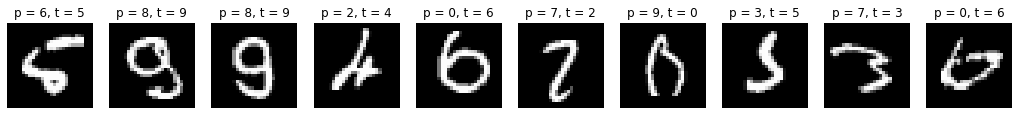

In [7]:
def visualize_mnist(X, y_true, y_pred):
    
    f, axarr = plt.subplots(1, 10, figsize=(18, 4))
    for i in range(10):
        axarr[i].set_title(f"p = {y_pred[i]}, t = {y_true[i]}")
        axarr[i].imshow(X[i,:,:], 'gray')
        axarr[i].axis('off')

    plt.show()

y_test = onehot_decode(y_test)  
y_pred = onehot_decode(y_pred)
filt_wrong = y_test != y_pred
visualize_mnist(x_test[filt_wrong].reshape((-1,28,28)), y_test[filt_wrong], y_pred[filt_wrong])